<a href="https://colab.research.google.com/github/Abhhiiissshhek/100_days_of_ML_challenge/blob/main/day-04-visualization/day04_titanic_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **100 days ml challenge**

## **Day 04**

In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# showing the total no. of missing values in the dataset
df.isnull().sum()

# showing the percentage of missing data
(df.isnull().sum() / len(df)) * 100

# Cabin is 77% missing - basically useless
df.drop('Cabin', axis=1, inplace=True)

# Age is 20% missing - fill with MEDIAN
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarked is 0.2% missing - fill with MODE
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.isnull().sum().sum() # our dataset is clean now !!

# Create Family Size from SibSp + Parch
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Create Age Groups
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Create IsAlone flag
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

print(df.head())




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize Title     AgeGroup  \
0      0         A/5 21171   7.2500        S           2    Mr        Adult   
1      0          PC 17599  71.2833        C           2   Mrs  Middle-Aged   
2      0  STON/O2. 3101282   7.9250        S           1  Miss        Adult   
3   

<>:27: SyntaxWarning: invalid escape sequence '\.'
<>:27: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2395809057.py:27: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/tmp/ipython-input-2395809057.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2395809057.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment us

## **Our featured Data :**
* Columns now:
1. AgeGroup
2. FamilySize
3. Title
4. IsAlone
5. FareGroup

**CLEAN ✅ → FEATURES ✅ → VISUALIZE 📊**

# **PLOT 1: SURVIVAL BY GENDER**

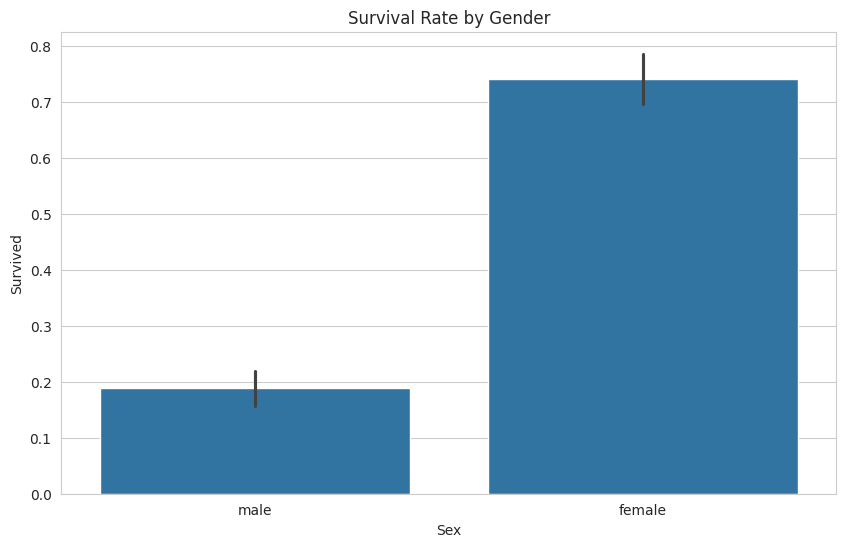

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

### **WOMEN 74% | MEN 19% ⚔️**

# **PLOT 2: SURVIVAL BY CLASS**

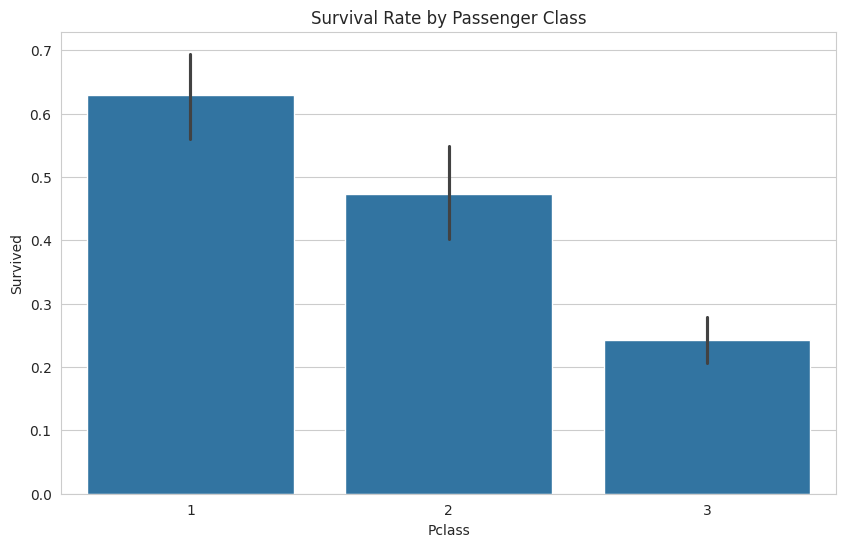

In [13]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

## **1st class : 63% | 2nd class : 47% | 3rd class : 24% 💰**

# **PLOT 3: SURVIVAL BY AGE GROUP**

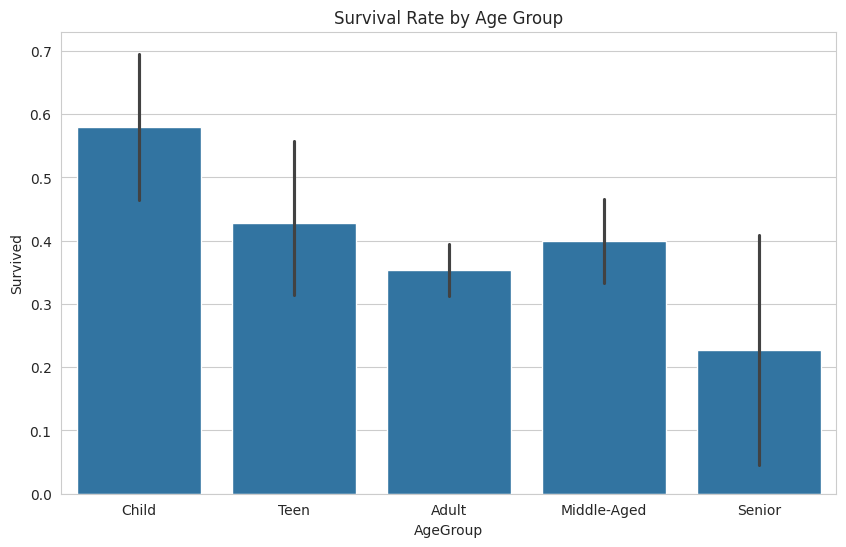

In [14]:
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

Children highest, seniors lowest

**CHILDREN 60% (highest) | SENIORS 20% (lowest)**

## **PLOT 4: SURVIVAL BY FAMILY SIZE**

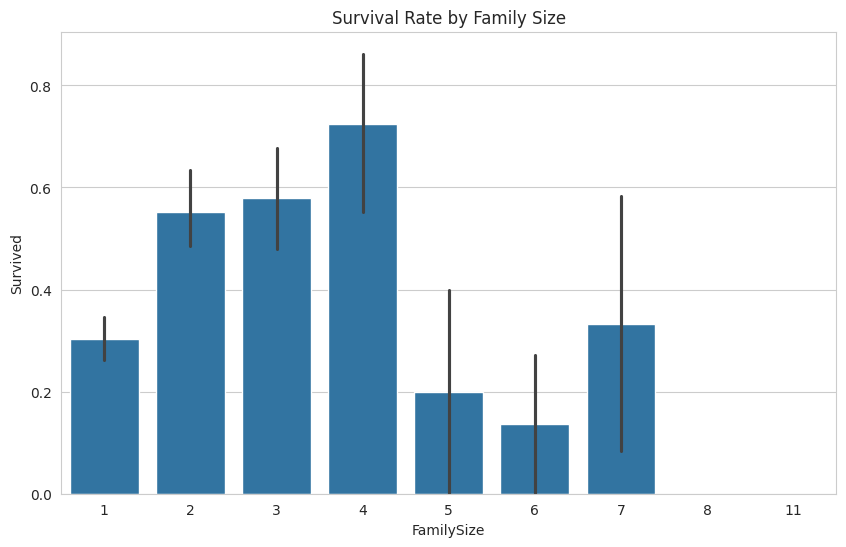

In [15]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

### **FAMILY OF 2-4 = BEST CHANCE 👨‍👩‍👧**

# **PLOT 5: SURVIVAL BY TITLE**

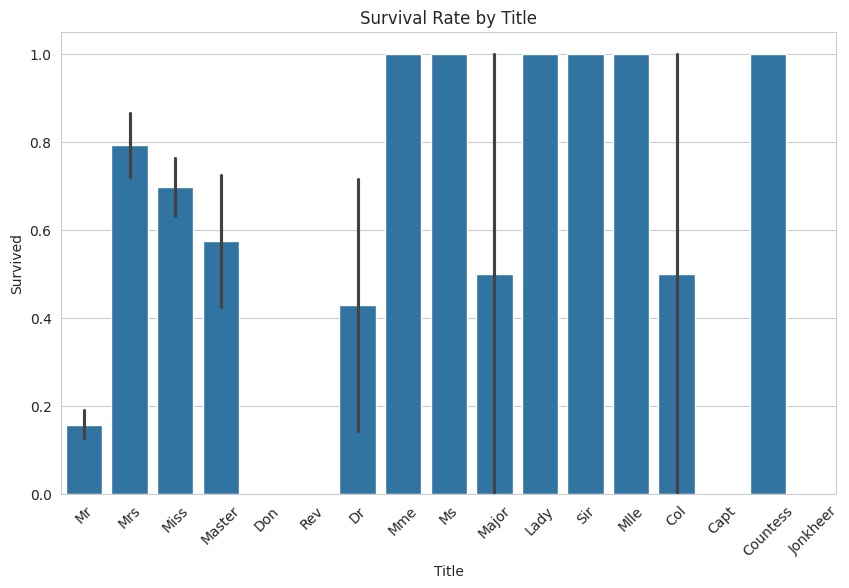

In [16]:
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.xticks(rotation=45)
plt.show()

Mrs/Miss high, Mr low

**Mrs/Miss = HIGH | Mr = LOW 👔**

# **HEATMAP (CORRELATION)**

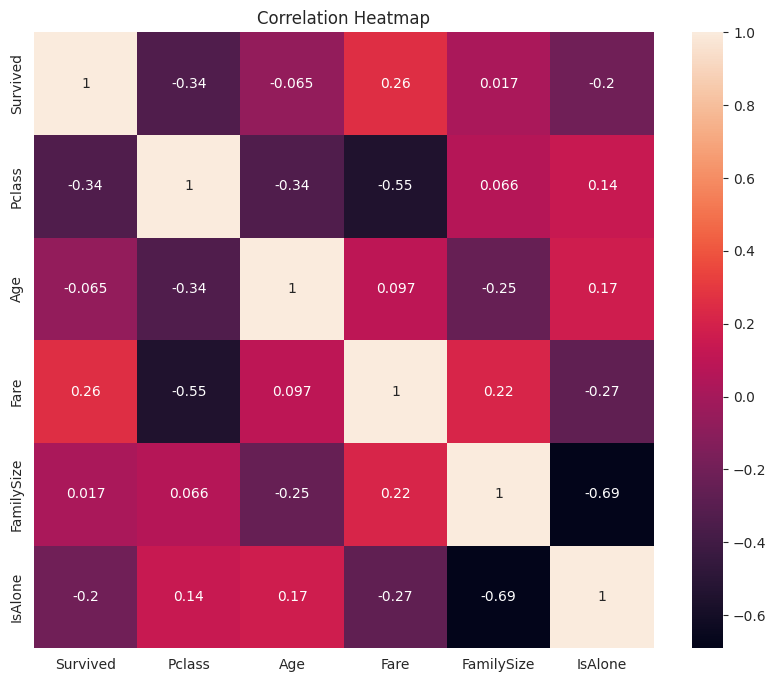

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['Survived','Pclass','Age','Fare','FamilySize','IsAlone']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

**TOP FACTORS: GENDER > CLASS > FARE**

* Women survived more than men

* Rich (1st class) survived more

* Children survived, seniors died

* Small families did best

* Alone = dangerous

# **5 PATTERNS FOUND!** ✅✅✅✅